In [1]:
import mne 
from mne import io
import numpy as np 

data_path = mne.datasets.sample.data_path()
meg_path = data_path / 'MEG' / 'sample'
raw_fname = meg_path / 'sample_audvis_filt-0-40_raw.fif'
event_fname = meg_path / 'sample_audvis_filt-0-40_raw-eve.fif'
event_id = 1
tmin = -0.2
tmax = 0.5

raw = io.read_raw_fif(raw_fname)
events = mne.read_events(event_fname)

Opening raw data file /Users/jacobloranger/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.


Not setting metadata
72 matching events found
Setting baseline interval to [-0.19979521315838786, 0.0] sec
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
4 projection items activated
[315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332
 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350
 351 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366 368 369
 370 371 372 373 374 375]
Loading data for 72 events and 106 original time points ...
0 bad epochs dropped
Using matplotlib as 2D backend.
Loading data for 20 events and 106 original time points ...


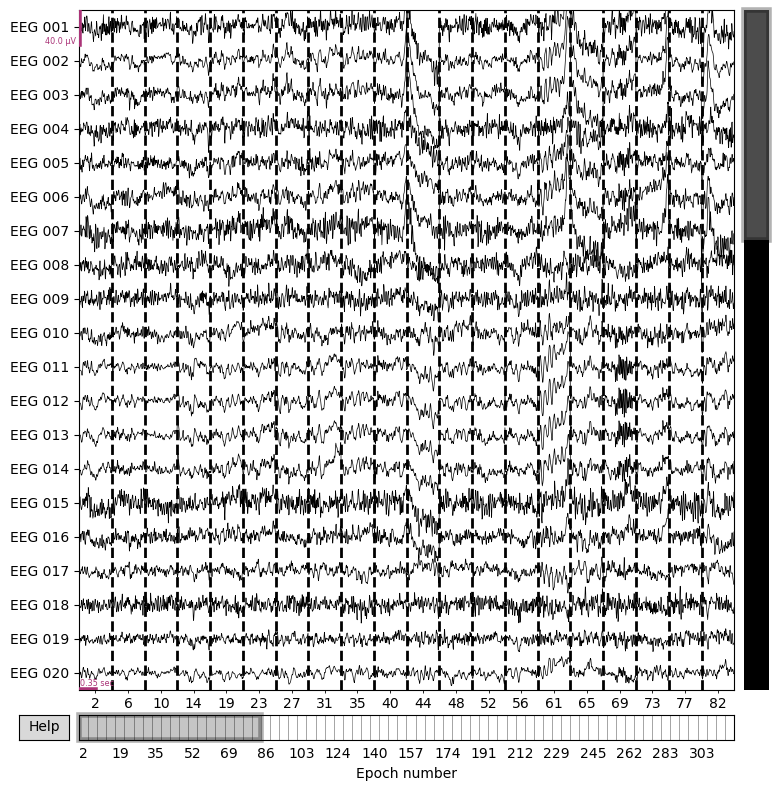

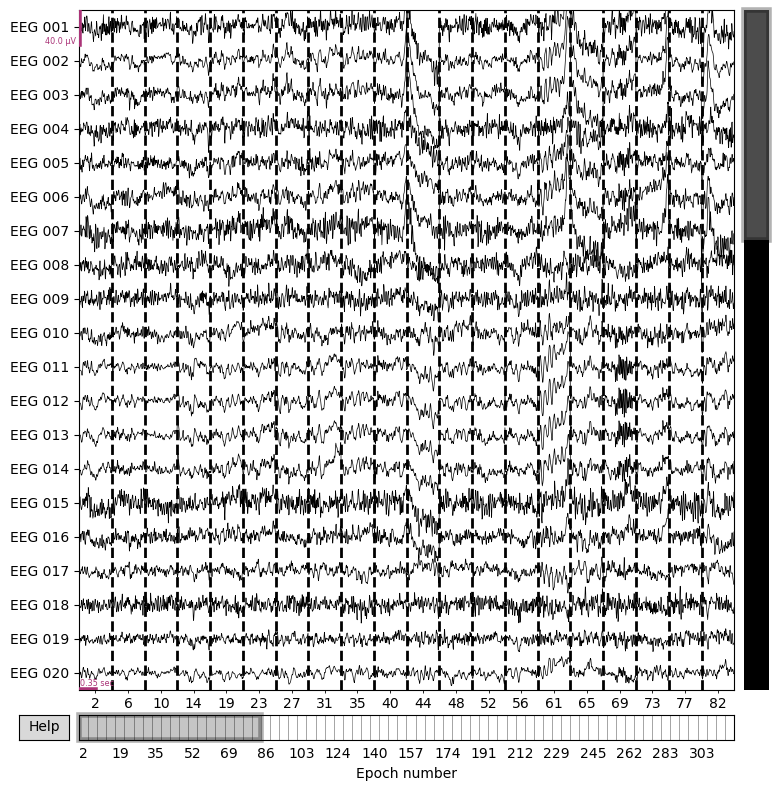

In [2]:
picks = mne.pick_types(raw.info, eeg=True, stim=False, eog=True,
                       exclude='bads')

epochs = mne.Epochs(raw, events, event_id, tmin, tmax, picks=picks,
                    baseline=(None, 0))

print(picks)
epochs.plot()

Loading data for 72 events and 106 original time points ...
[[[ 5.79761105e-06  4.42830677e-06 -3.32965876e-06 ... -1.01171446e-06
   -5.39981842e-06 -7.43782179e-06]
  [ 9.34152908e-07  8.83082074e-08 -3.47361513e-06 ... -9.47089089e-06
   -7.23410509e-06 -9.34892821e-06]
  [-1.02625825e-06  8.50064971e-07  1.73368357e-06 ... -1.01528418e-05
   -8.39944911e-06 -1.07347679e-05]
  ...
  [ 4.81743685e-07  8.48431554e-07  8.75833020e-07 ...  6.39662684e-06
    5.99733168e-06  6.86264451e-06]
  [-2.75863002e-06 -3.07336242e-06 -3.00902778e-06 ...  3.32847363e-06
    2.71609712e-06  2.68885412e-06]
  [-5.90281978e-06 -3.86070470e-06 -1.25999990e-06 ...  4.86930300e-06
    5.79236292e-06  3.74660667e-06]]

 [[-1.99157698e-06 -9.58787846e-07 -3.28072999e-06 ...  4.50181473e-06
   -2.31931644e-06 -1.51597537e-05]
  [-5.30279678e-06 -3.46425104e-06 -3.11786102e-06 ... -9.31658708e-07
   -1.72570849e-06 -5.75161314e-06]
  [-1.01384995e-05 -5.47037475e-06 -2.80848958e-06 ...  2.38172558e-06
    4

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


[1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 9.9528e-01
 9.9974e-01 9.9892e-01 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00
 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 7.7352e-01 9.2830e-01
 8.7732e-01 9.7602e-01 9.9914e-01 8.6144e-01 9.2544e-01 1.0506e-01
 9.3308e-01 8.9090e-01 1.0000e+00 6.7332e-01 4.4146e-01 7.2108e-01
 9.9434e-01 9.9994e-01 8.0766e-01 5.1000e-03 9.6000e-03 9.7676e-01
 1.0000e+00 3.4198e-01 1.2142e-01 8.4300e-01 1.0000e+00 6.0000e-04
 6.4000e-03 9.5114e-01 1.5326e-01 5.0360e-02 4.5760e-02 2.6170e-01
 5.0136e-01 1.0000e+00 1.0000e+00 1.1100e-02 2.5842e-01 1.0000e+00
 7.7928e-01 9.5624e-01 9.9992e-01 1.0000e+00 9.6786e-01 9.9388e-01]
[348 349 356 357 361 366]


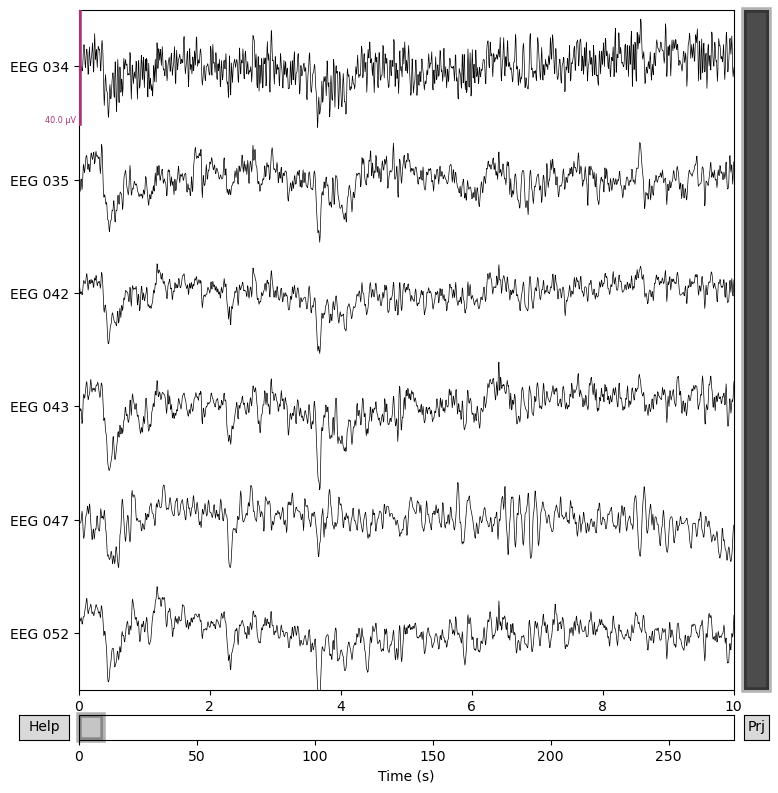

In [3]:
data = epochs.get_data()
times = epochs.times

print(data)

temporal_mask = np.logical_and(0.04 <= times, times <= 0.06)
data = np.mean(data[:, :, temporal_mask], axis=2)

n_permutations = 50000
T0, p_values, H0 = mne.stats.permutation_t_test(data, n_permutations, n_jobs=None)

print(p_values)

significant_sensors = picks[p_values <= 0.05]

print(significant_sensors)

raw.plot(order=significant_sensors);


